# AudioClassification_EDA

#### Exploratory Data Analysis(EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Dataset Link:- https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import wavfile as wav

import pandas as pd
import os

In [3]:
debussy_file = 'dog_bark.wav'

In [4]:
ipd.Audio(debussy_file)

In [5]:
# load audio files with librosa
data, sr = librosa.load(debussy_file)

Text(0.5, 1.0, 'Debusy')

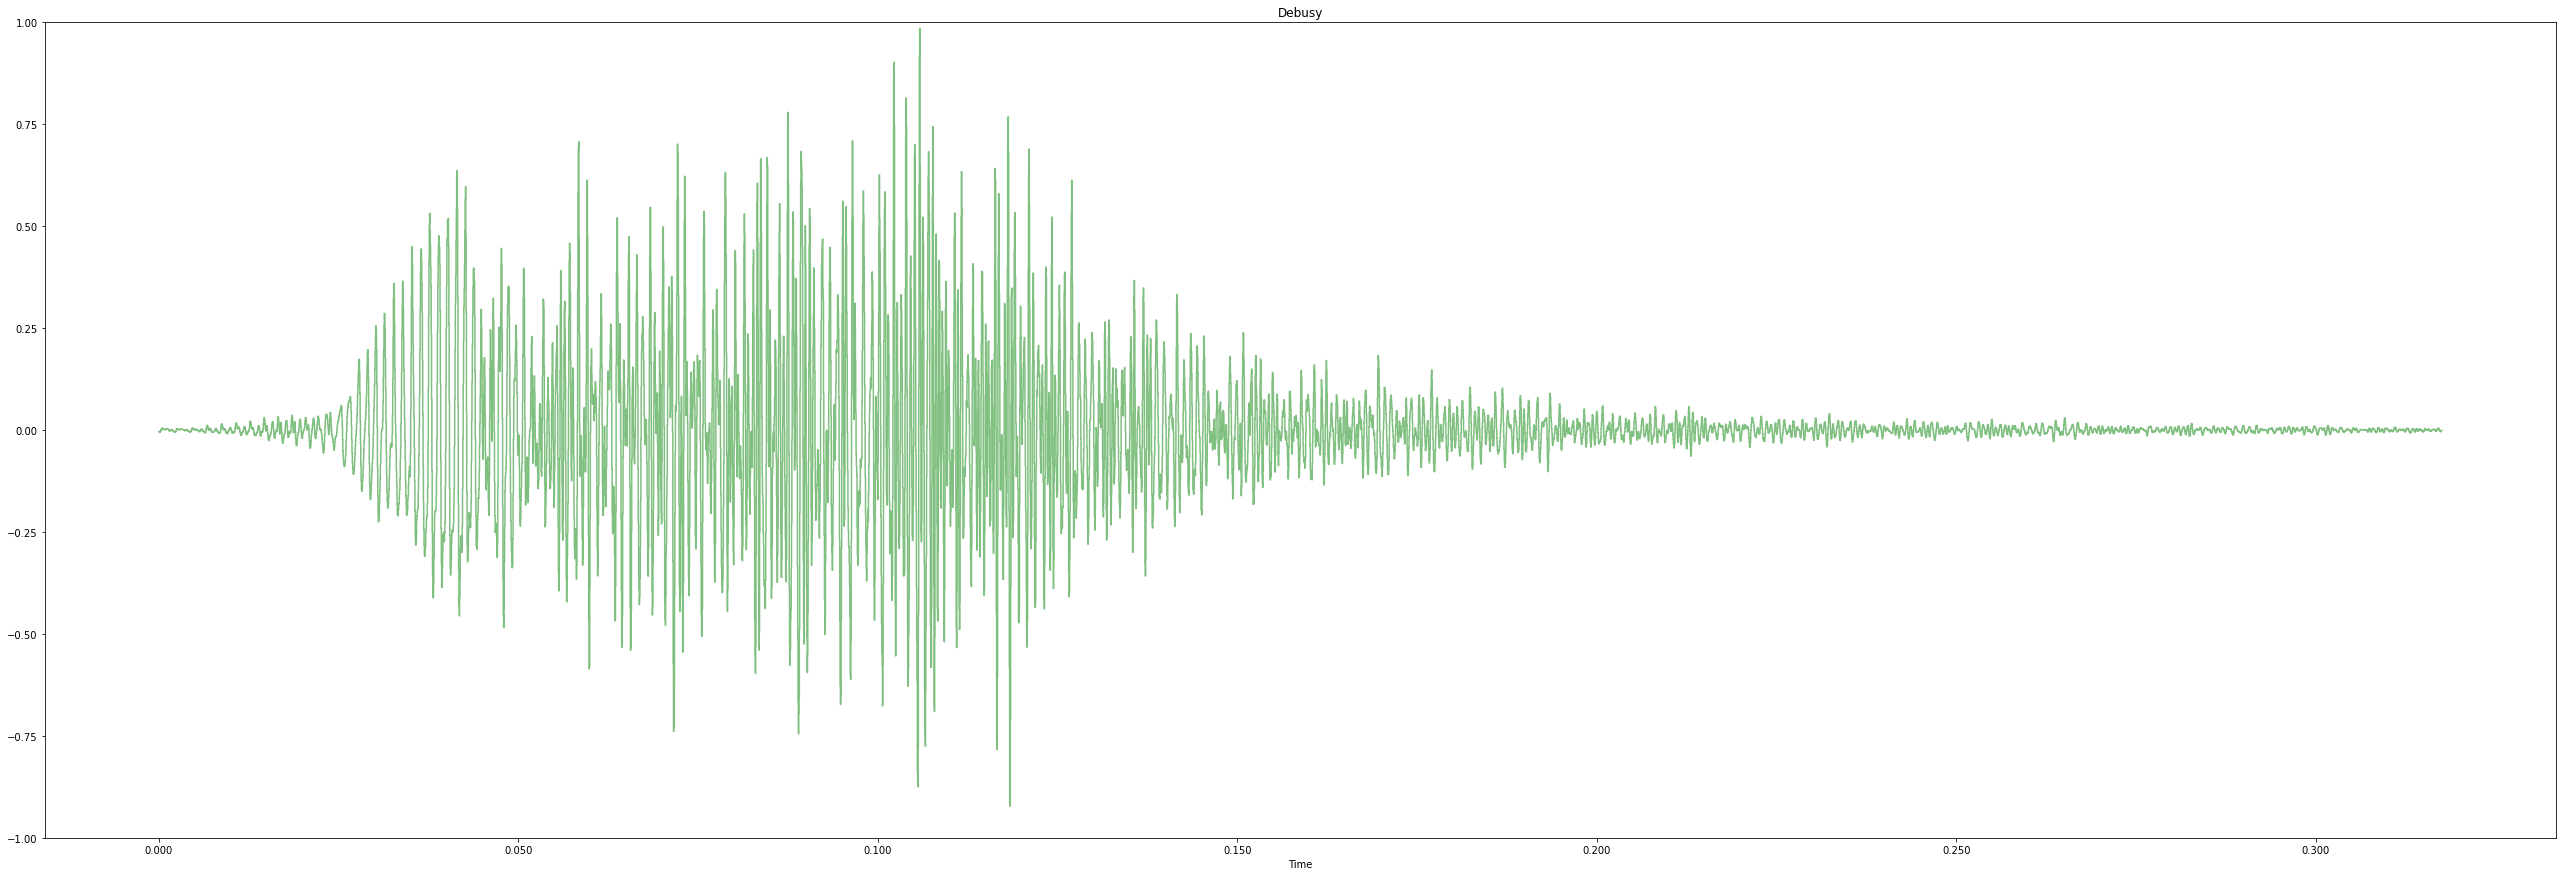

In [6]:
# visualize the waveform

plt.figure(figsize=(45, 15))

plt.subplot(1,1,1)
librosa.display.waveshow(data, alpha=0.5, color='g')
plt.ylim((-1, 1))
plt.title("Debusy")

In [7]:
sr

22050

In [8]:
scipy_sr, scipy_data = wav.read(debussy_file)

In [9]:
scipy_sr

44100

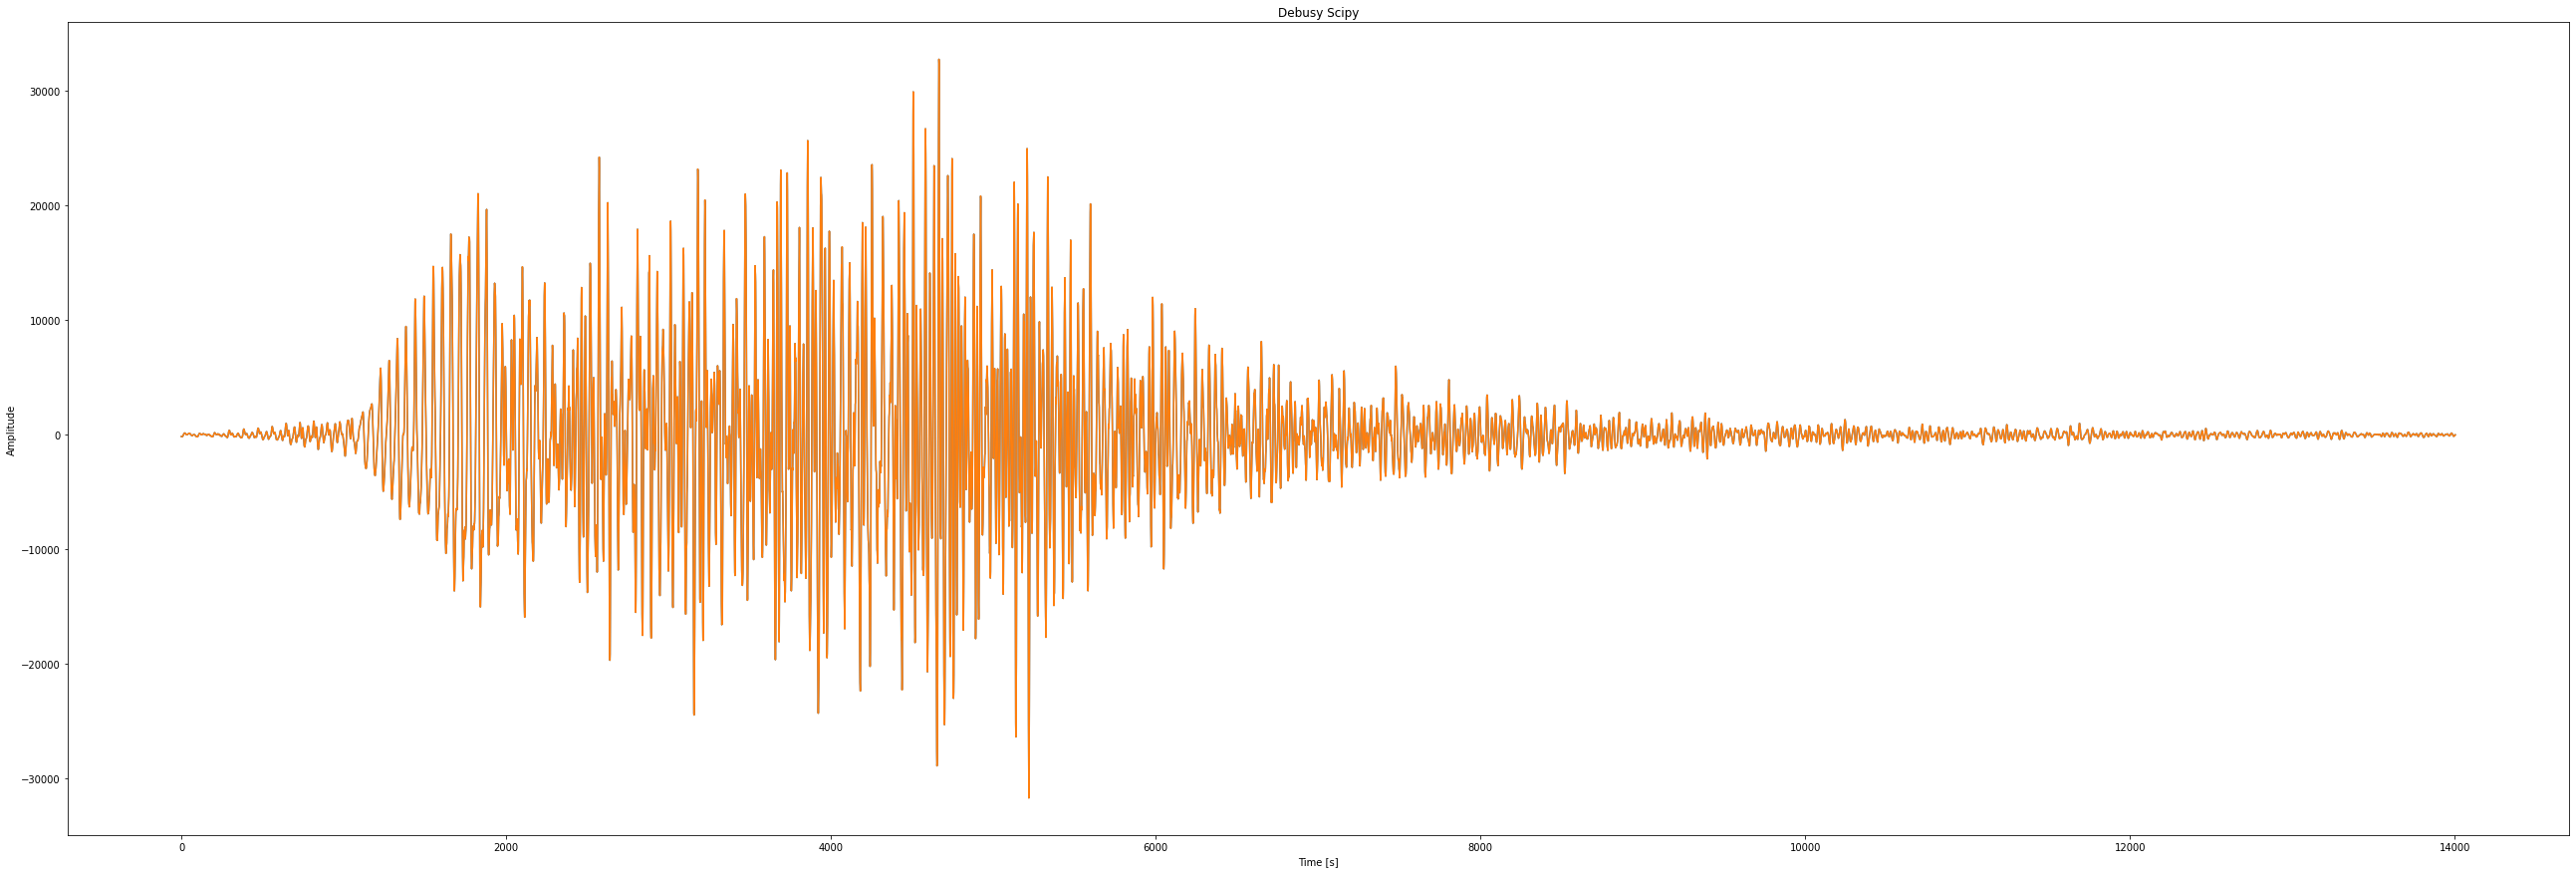

In [10]:
# visualize the waveform 

plt.figure(figsize=(45, 15))
plt.plot(scipy_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title("Debusy Scipy")
plt.show()

### librossa_data vs scipy_data

In [11]:
data      ### amplitudes normalized btw. -1 & 1, mono audio

array([-0.00346022, -0.00502555, -0.00465325, ..., -0.00248061,
       -0.00155105, -0.0003528 ], dtype=float32)

In [12]:
scipy_data    ### original amplitudes, stereo audio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

### Reading metadata.csv

In [13]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(12)

slice_file_name    fsID      start        end  salience  fold  classID  \
0     100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1   100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2   100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3   100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4   100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5   100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6   100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7     100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8    100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9     100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   
10    100648-1-1-0.wav  100648   8.998279  10.052132         2    10        1   
11    100648-1-2-0.wav  100648  16.699509  17.104837         2    10        1   

               class  
0           dog_bark  
1   children_playing  
2   children_playing  
3   children_playing  
4   children_playing  
5   children_playing  
6   children_playing  
7   children_playing  
8   children_playing  
9           car_horn  
10          car_horn  
11          car_horn

## checking whether dataset is imbalanced

In [14]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [15]:
# not that much imbalanced dataset -> since approx equal no. of audio files of each category is present

## Vid#2

## Extracting features

## Mel Frequency Cepstral Coefficients(MFCC) -
        MFCC summarizes the frequency distribution across window size
        This way, we can analyse both freq. & time characteristics of the sound

In [16]:
mfccs = librosa.feature.mfcc(y=data, n_mfcc=13, sr=sr)

In [17]:
mfccs.shape

(13, 14)

In [18]:
mfccs

array([[-3.32427124e+02, -1.70277924e+02, -9.08981323e+01,
        -5.75579910e+01, -4.08698387e+01, -5.11360359e+01,
        -9.97961960e+01, -1.60304886e+02, -2.16299332e+02,
        -2.68092957e+02, -3.16590179e+02, -3.55580566e+02,
        -3.90174805e+02, -4.23439819e+02],
       [ 1.19947655e+02,  8.42706680e+01,  6.26093369e+01,
         4.90830307e+01,  3.99806747e+01,  3.48531494e+01,
         3.15616112e+01,  3.52858582e+01,  4.51611938e+01,
         5.68097420e+01,  6.87062302e+01,  7.88703461e+01,
         8.59241333e+01,  9.20206223e+01],
       [-1.03422852e+02, -1.21067368e+02, -1.30418457e+02,
        -1.38000931e+02, -1.44247437e+02, -1.46115784e+02,
        -1.40776672e+02, -1.30486084e+02, -1.27024536e+02,
        -1.23836563e+02, -1.14751450e+02, -1.10337631e+02,
        -1.04676651e+02, -9.31469498e+01],
       [-5.20450516e+01, -6.10827141e+01, -7.29892883e+01,
        -7.81552887e+01, -7.49615784e+01, -7.40660706e+01,
        -7.26750183e+01, -6.61524124e+01, -6.

### Visualizing MFCC

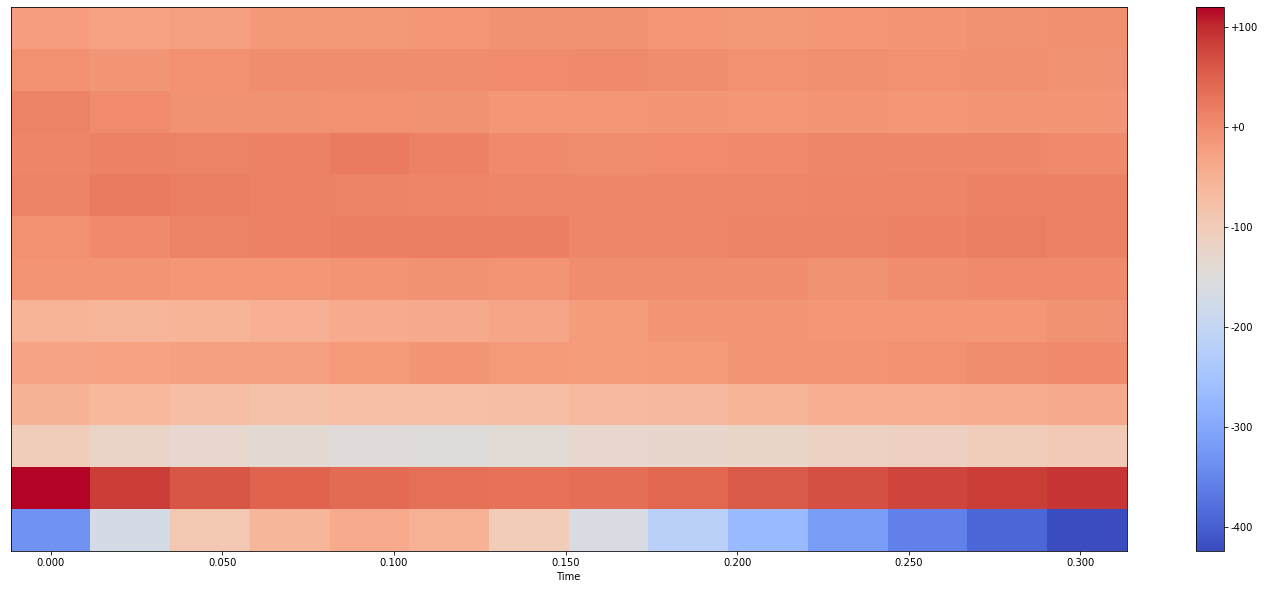

In [19]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Extracting MFCC for all audio files

In [20]:
audio_dataset_path = 'UrbanSound8K/audio/'

In [21]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_feature = np.mean(mfccs_feature.T, axis=0)
    
    return mfccs_scaled_feature

In [29]:
metadata

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

In [33]:
from tqdm import tqdm    # here used to see progress
for index, row in tqdm(metadata.iterrows()):
    print(row)

307it [00:00, 1595.28it/s]

slice_file_name    100032-3-0-0.wav
fsID                         100032
start                           0.0
end                        0.317551
salience                          1
fold                              5
classID                           3
class                      dog_bark
Name: 0, dtype: object
slice_file_name    100263-2-0-117.wav
fsID                           100263
start                            58.5
end                              62.5
salience                            1
fold                                5
classID                             2
class                children_playing
Name: 1, dtype: object
slice_file_name    100263-2-0-121.wav
fsID                           100263
start                            60.5
end                              64.5
salience                            1
fold                                5
classID                             2
class                children_playing
Name: 2, dtype: object
slice_file_name    100263-2-0-126.w

706it [00:00, 1759.09it/s]

slice_file_name    105289-8-1-1.wav
fsID                         105289
start                     40.926771
end                       44.926771
salience                          1
fold                              7
classID                           8
class                         siren
Name: 428, dtype: object
slice_file_name    105289-8-1-2.wav
fsID                         105289
start                     41.426771
end                       45.426771
salience                          1
fold                              7
classID                           8
class                         siren
Name: 429, dtype: object
slice_file_name    105289-8-1-3.wav
fsID                         105289
start                     41.926771
end                       45.926771
salience                          1
fold                              7
classID                           8
class                         siren
Name: 430, dtype: object
slice_file_name    105289-8-1-4.wav
fsID                     

1249it [00:00, 1772.72it/s]

slice_file_name    118278-4-0-10.wav
fsID                          118278
start                            5.0
end                              9.0
salience                           2
fold                              10
classID                            4
class                       drilling
Name: 883, dtype: object
slice_file_name    118278-4-0-11.wav
fsID                          118278
start                            5.5
end                              9.5
salience                           2
fold                              10
classID                            4
class                       drilling
Name: 884, dtype: object
slice_file_name    118278-4-0-12.wav
fsID                          118278
start                            6.0
end                             10.0
salience                           2
fold                              10
classID                            4
class                       drilling
Name: 885, dtype: object
slice_file_name    118278-4-0-13.wav


1441it [00:00, 1818.53it/s]

slice_file_name    130961-4-2-1.wav
fsID                         130961
start                    205.813507
end                      209.813507
salience                          1
fold                              7
classID                           4
class                      drilling
Name: 1249, dtype: object
slice_file_name    130961-4-2-2.wav
fsID                         130961
start                    206.313507
end                      210.313507
salience                          1
fold                              7
classID                           4
class                      drilling
Name: 1250, dtype: object
slice_file_name    130961-4-3-0.wav
fsID                         130961
start                    253.231956
end                      257.231956
salience                          1
fold                              7
classID                           4
class                      drilling
Name: 1251, dtype: object
slice_file_name    130961-4-3-1.wav
fsID                  

1810it [00:01, 1597.61it/s]

slice_file_name    139951-9-0-13.wav
fsID                          139951
start                            6.5
end                             10.5
salience                           1
fold                               1
classID                            9
class                   street_music
Name: 1602, dtype: object
slice_file_name    139951-9-0-17.wav
fsID                          139951
start                            8.5
end                             12.5
salience                           1
fold                               1
classID                            9
class                   street_music
Name: 1603, dtype: object
slice_file_name    139951-9-0-29.wav
fsID                          139951
start                           14.5
end                             18.5
salience                           1
fold                               1
classID                            9
class                   street_music
Name: 1604, dtype: object
slice_file_name    139951-9-0-33.w

2170it [00:01, 1697.42it/s]

slice_file_name    147672-3-1-0.wav
fsID                         147672
start                      1.726745
end                        2.188385
salience                          1
fold                              2
classID                           3
class                      dog_bark
Name: 1956, dtype: object
slice_file_name    147672-3-2-0.wav
fsID                         147672
start                      3.781219
end                        4.161808
salience                          1
fold                              2
classID                           3
class                      dog_bark
Name: 1957, dtype: object
slice_file_name    14772-7-0-0.wav
fsID                         14772
start                      0.78467
end                       2.045746
salience                         1
fold                             7
classID                          7
class                   jackhammer
Name: 1958, dtype: object
slice_file_name    14772-7-1-0.wav
fsID                         14

2767it [00:01, 1895.32it/s]

slice_file_name    156362-4-0-1.wav
fsID                         156362
start                    111.910002
end                      115.910002
salience                          2
fold                              4
classID                           4
class                      drilling
Name: 2352, dtype: object
slice_file_name    156362-4-0-2.wav
fsID                         156362
start                    112.410002
end                      116.410002
salience                          2
fold                              4
classID                           4
class                      drilling
Name: 2353, dtype: object
slice_file_name    156362-4-0-3.wav
fsID                         156362
start                    112.910002
end                      116.910002
salience                          2
fold                              4
classID                           4
class                      drilling
Name: 2354, dtype: object
slice_file_name    156362-4-1-0.wav
fsID                  

2959it [00:01, 1786.74it/s]

slice_file_name    159752-8-2-0.wav
fsID                         159752
start                     36.303143
end                       40.303143
salience                          2
fold                              4
classID                           8
class                         siren
Name: 2767, dtype: object
slice_file_name    159752-8-2-1.wav
fsID                         159752
start                     36.803143
end                       40.803143
salience                          2
fold                              4
classID                           8
class                         siren
Name: 2768, dtype: object
slice_file_name    159752-8-2-2.wav
fsID                         159752
start                     37.303143
end                       41.303143
salience                          2
fold                              4
classID                           8
class                         siren
Name: 2769, dtype: object
slice_file_name    159752-8-2-3.wav
fsID                  

3320it [00:01, 1677.39it/s]

slice_file_name    165454-0-0-7.wav
fsID                         165454
start                           3.5
end                             7.5
salience                          1
fold                              9
classID                           0
class               air_conditioner
Name: 3133, dtype: object
slice_file_name    165454-0-0-8.wav
fsID                         165454
start                           4.0
end                             8.0
salience                          1
fold                              9
classID                           0
class               air_conditioner
Name: 3134, dtype: object
slice_file_name    165454-0-0-9.wav
fsID                         165454
start                           4.5
end                             8.5
salience                          1
fold                              9
classID                           0
class               air_conditioner
Name: 3135, dtype: object
slice_file_name    165529-2-0-18.wav
fsID                 

3655it [00:02, 1482.79it/s]

slice_file_name    171305-7-2-0.wav
fsID                         171305
start                     12.941627
end                       16.941627
salience                          1
fold                              4
classID                           7
class                    jackhammer
Name: 3476, dtype: object
slice_file_name    171305-7-20-0.wav
fsID                          171305
start                      83.347939
end                        84.217152
salience                           1
fold                               4
classID                            7
class                     jackhammer
Name: 3477, dtype: object
slice_file_name    171305-7-21-0.wav
fsID                          171305
start                      84.796628
end                        85.472683
salience                           1
fold                               4
classID                            7
class                     jackhammer
Name: 3478, dtype: object
slice_file_name    171305-7-22-0.wav
fsID 

4191it [00:02, 1659.05it/s]

slice_file_name    177537-7-0-24.wav
fsID                          177537
start                           12.0
end                             16.0
salience                           2
fold                               7
classID                            7
class                     jackhammer
Name: 3814, dtype: object
slice_file_name    177537-7-0-25.wav
fsID                          177537
start                           12.5
end                             16.5
salience                           2
fold                               7
classID                            7
class                     jackhammer
Name: 3815, dtype: object
slice_file_name    177537-7-0-26.wav
fsID                          177537
start                           13.0
end                             17.0
salience                           2
fold                               7
classID                            7
class                     jackhammer
Name: 3816, dtype: object
slice_file_name    177537-7-0-27.w

4552it [00:02, 1729.53it/s]

slice_file_name    180125-4-1-3.wav
fsID                         180125
start                     42.348486
end                       46.348486
salience                          1
fold                              5
classID                           4
class                      drilling
Name: 4191, dtype: object
slice_file_name    180125-4-1-5.wav
fsID                         180125
start                     43.348486
end                       47.348486
salience                          1
fold                              5
classID                           4
class                      drilling
Name: 4192, dtype: object
slice_file_name    180125-4-1-7.wav
fsID                         180125
start                     44.348486
end                       48.348486
salience                          1
fold                              5
classID                           4
class                      drilling
Name: 4193, dtype: object
slice_file_name    180125-4-1-8.wav
fsID                  

4897it [00:02, 1680.47it/s]

slice_file_name    185801-4-0-0.wav
fsID                         185801
start                      0.088953
end                        4.088953
salience                          2
fold                              3
classID                           4
class                      drilling
Name: 4552, dtype: object
slice_file_name    185801-4-0-1.wav
fsID                         185801
start                      0.588953
end                        4.588953
salience                          2
fold                              3
classID                           4
class                      drilling
Name: 4553, dtype: object
slice_file_name    185801-4-0-2.wav
fsID                         185801
start                      1.088953
end                        5.088953
salience                          2
fold                              3
classID                           4
class                      drilling
Name: 4554, dtype: object
slice_file_name    18581-3-0-0.wav
fsID                   

5235it [00:03, 1622.25it/s]

slice_file_name    193698-2-0-140.wav
fsID                           193698
start                            70.0
end                              74.0
salience                            2
fold                                1
classID                             2
class                children_playing
Name: 4897, dtype: object
slice_file_name    193698-2-0-42.wav
fsID                          193698
start                           21.0
end                             25.0
salience                           2
fold                               1
classID                            2
class               children_playing
Name: 4898, dtype: object
slice_file_name    193698-2-0-58.wav
fsID                          193698
start                           29.0
end                             33.0
salience                           2
fold                               1
classID                            2
class               children_playing
Name: 4899, dtype: object
slice_file_name    193698-

5585it [00:03, 1678.85it/s]

slice_file_name    201988-5-0-9.wav
fsID                         201988
start                      6.171607
end                       10.171607
salience                          1
fold                              7
classID                           5
class                 engine_idling
Name: 5235, dtype: object
slice_file_name    201988-5-1-0.wav
fsID                         201988
start                     53.567401
end                       56.302757
salience                          1
fold                              7
classID                           5
class                 engine_idling
Name: 5236, dtype: object
slice_file_name    202334-9-0-105.wav
fsID                           202334
start                            52.5
end                              56.5
salience                            1
fold                               10
classID                             9
class                    street_music
Name: 5237, dtype: object
slice_file_name    202334-9-0-106.wav
fsID

5928it [00:03, 1668.20it/s]

slice_file_name    22347-3-1-2.wav
fsID                         22347
start                     4.562067
end                       8.562067
salience                         1
fold                             2
classID                          3
class                     dog_bark
Name: 5585, dtype: object
slice_file_name    22347-3-3-0.wav
fsID                         22347
start                    18.188915
end                      22.188915
salience                         1
fold                             2
classID                          3
class                     dog_bark
Name: 5586, dtype: object
slice_file_name    22601-8-0-0.wav
fsID                         22601
start                          0.0
end                            4.0
salience                         2
fold                             3
classID                          8
class                        siren
Name: 5587, dtype: object
slice_file_name    22601-8-0-1.wav
fsID                         22601
start       

6096it [00:03, 1454.92it/s]

slice_file_name    27216-3-0-24.wav
fsID                          27216
start                      12.81491
end                        16.81491
salience                          1
fold                              7
classID                           3
class                      dog_bark
Name: 5928, dtype: object
slice_file_name    27216-3-0-9.wav
fsID                         27216
start                      5.31491
end                        9.31491
salience                         1
fold                             7
classID                          3
class                     dog_bark
Name: 5929, dtype: object
slice_file_name    27217-3-0-13.wav
fsID                          27217
start                           6.5
end                            10.5
salience                          1
fold                              7
classID                           3
class                      dog_bark
Name: 5930, dtype: object
slice_file_name    27217-3-0-22.wav
fsID                          

6438it [00:03, 1575.89it/s]

slice_file_name    35628-3-0-0.wav
fsID                         35628
start                     0.689299
end                       4.689299
salience                         1
fold                            10
classID                          3
class                     dog_bark
Name: 6226, dtype: object
slice_file_name    35629-3-0-0.wav
fsID                         35629
start                      2.06663
end                        4.87455
salience                         1
fold                             4
classID                          3
class                     dog_bark
Name: 6227, dtype: object
slice_file_name    35629-3-1-0.wav
fsID                         35629
start                     7.300594
end                      11.300594
salience                         1
fold                             4
classID                          3
class                     dog_bark
Name: 6228, dtype: object
slice_file_name    35629-3-2-0.wav
fsID                         35629
start       

6942it [00:04, 1584.22it/s]

slice_file_name    50413-4-0-1.wav
fsID                         50413
start                     0.536027
end                       4.536027
salience                         1
fold                             5
classID                          4
class                     drilling
Name: 6602, dtype: object
slice_file_name    50413-4-0-2.wav
fsID                         50413
start                     1.036027
end                       5.036027
salience                         1
fold                             5
classID                          4
class                     drilling
Name: 6603, dtype: object
slice_file_name    50413-4-0-3.wav
fsID                         50413
start                     1.536027
end                       5.536027
salience                         1
fold                             5
classID                          4
class                     drilling
Name: 6604, dtype: object
slice_file_name    50414-4-0-0.wav
fsID                         50414
start       

7304it [00:04, 1694.37it/s]

slice_file_name    58937-4-0-12.wav
fsID                          58937
start                      7.200341
end                       11.200341
salience                          1
fold                              9
classID                           4
class                      drilling
Name: 6942, dtype: object
slice_file_name    58937-4-0-13.wav
fsID                          58937
start                      7.700341
end                       11.700341
salience                          1
fold                              9
classID                           4
class                      drilling
Name: 6943, dtype: object
slice_file_name    58937-4-0-2.wav
fsID                         58937
start                     2.200341
end                       6.200341
salience                         1
fold                             9
classID                          4
class                     drilling
Name: 6944, dtype: object
slice_file_name    58937-4-0-4.wav
fsID                         58

7646it [00:04, 1608.90it/s]

slice_file_name    68080-7-0-2.wav
fsID                         68080
start                          1.0
end                            5.0
salience                         1
fold                             8
classID                          7
class                   jackhammer
Name: 7304, dtype: object
slice_file_name    68080-7-0-3.wav
fsID                         68080
start                          1.5
end                            5.5
salience                         1
fold                             8
classID                          7
class                   jackhammer
Name: 7305, dtype: object
slice_file_name    68080-7-0-4.wav
fsID                         68080
start                          2.0
end                            6.0
salience                         1
fold                             8
classID                          7
class                   jackhammer
Name: 7306, dtype: object
slice_file_name    68080-7-0-5.wav
fsID                         68080
start       

7994it [00:04, 1629.90it/s]

slice_file_name    74507-0-0-24.wav
fsID                          74507
start                          12.0
end                            16.0
salience                          1
fold                              2
classID                           0
class               air_conditioner
Name: 7763, dtype: object
slice_file_name    74507-0-0-25.wav
fsID                          74507
start                          12.5
end                            16.5
salience                          1
fold                              2
classID                           0
class               air_conditioner
Name: 7764, dtype: object
slice_file_name    74507-0-0-27.wav
fsID                          74507
start                          13.5
end                            17.5
salience                          1
fold                              2
classID                           0
class               air_conditioner
Name: 7765, dtype: object
slice_file_name    74507-0-0-28.wav
fsID                  

8327it [00:05, 1552.29it/s]

slice_file_name    79584-3-1-2.wav
fsID                         79584
start                    38.833412
end                      42.833412
salience                         1
fold                             9
classID                          3
class                     dog_bark
Name: 8141, dtype: object
slice_file_name    7965-3-11-0.wav
fsID                          7965
start                    95.717477
end                      97.067061
salience                         1
fold                            10
classID                          3
class                     dog_bark
Name: 8142, dtype: object
slice_file_name    7965-3-16-0.wav
fsID                          7965
start                   108.954389
end                     110.833354
salience                         2
fold                            10
classID                          3
class                     dog_bark
Name: 8143, dtype: object
slice_file_name    7965-3-22-0.wav
fsID                          7965
start       

8732it [00:05, 1644.99it/s]

slice_file_name    93567-8-0-18.wav
fsID                          93567
start                     13.044365
end                       17.044365
salience                          2
fold                             10
classID                           8
class                         siren
Name: 8452, dtype: object
slice_file_name    93567-8-0-19.wav
fsID                          93567
start                     13.544365
end                       17.544365
salience                          2
fold                             10
classID                           8
class                         siren
Name: 8453, dtype: object
slice_file_name    93567-8-0-2.wav
fsID                         93567
start                     5.044365
end                       9.044365
salience                         2
fold                            10
classID                          8
class                        siren
Name: 8454, dtype: object
slice_file_name    93567-8-0-3.wav
fsID                         93

In [37]:
# iterating through all the files to extract MFCC
from tqdm import tqdm    # here used to see progress
extracted_features = []
for index, row in tqdm(metadata.iterrows()):   # to iterate through all the rows of metadata
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row['fold']) + '/', str(row['slice_file_name']) )
    print(file_name)
    final_class_labels = row['class']
    print(final_class_labels)
    
#     new_data = feature_extractor(file=file_name)
#     extracted_features.append([new_data, final_class_labels])

2735it [00:00, 13713.06it/s]

C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/100032-3-0-0.wav
dog_bark
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/100263-2-0-117.wav
children_playing
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/100263-2-0-121.wav
children_playing
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/100263-2-0-126.wav
children_playing
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/100263-2-0-137.wav
children_playing
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/100263-2-0-143.wav
children_playing
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/100263-2-0-161.wav
children_playing
C:\11Drive\myCodes\audioSignal

5463it [00:00, 12579.01it/s]

C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/159751-8-0-12.wav
siren
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/159751-8-0-13.wav
siren
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/159751-8-0-14.wav
siren
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/159751-8-0-15.wav
siren
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/159751-8-0-16.wav
siren
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/159751-8-0-17.wav
siren
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/159751-8-0-18.wav
siren
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold4/

8732it [00:00, 12500.46it/s]

C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold8/50668-5-4-0.wav
engine_idling
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold8/50668-5-5-0.wav
engine_idling
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold8/50668-5-5-1.wav
engine_idling
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold8/50668-5-5-2.wav
engine_idling
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold8/50668-5-6-0.wav
engine_idling
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold8/50668-5-7-0.wav
engine_idling
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssification_KrishNaik\UrbanSound8K\audio\fold5/50885-3-0-2.wav
dog_bark
C:\11Drive\myCodes\audioSignalProcessingML\urbanSoundClasssificatio

In [22]:
# converting the extracted_features list into pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])

In [23]:
extracted_features_df.head()

features             class
0  [-218.18938, 71.38549, -131.49442, -52.25892, ...          dog_bark
1  [-425.05234, 110.67095, -54.192833, 62.045406,...  children_playing
2  [-459.82623, 122.82864, -47.908062, 53.302677,...  children_playing
3  [-414.82184, 102.94826, -36.65685, 54.170742, ...  children_playing
4  [-447.60776, 115.08627, -53.74607, 61.55309, 1...  children_playing

In [24]:
# splitting dataset into independent & dependent features

X = np.array(extracted_features_df['features'].to_list())
Y = np.array(extracted_features_df['class'].to_list())

In [25]:
X.shape

(8732, 40)

In [26]:
Y.shape

(8732,)

In [27]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
### Label Encoding
# Y = np.array(pd.get_dummies(Y))

### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [29]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
Y.shape

(8732, 10)

#### Train Test Split

In [31]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
X_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912868e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008629e+00, -1.5975088e+00],
       [-4.9827820e+01,  1.8449357e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159244e-01,  2.7930872e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066742e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839476e+00, -1.9667519e+00, -8.8792086e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413874e+00]], dtype=float32)

In [33]:
X_train.shape

(6985, 40)

In [34]:
X_test

array([[-2.6864090e+02,  1.0516959e+02,  1.6310549e+01, ...,
        -1.5550406e+00, -6.6717374e-01, -3.0795305e+00],
       [-4.6647327e+02,  1.5016655e+00, -3.4400040e+01, ...,
         1.7706207e+01,  1.3831075e+01, -5.1632876e+00],
       [-9.4321190e+01,  4.5096165e+01, -4.3605549e+01, ...,
         4.3434143e+00, -7.7579916e-01, -1.7241189e+00],
       ...,
       [-1.2965582e+02,  1.4068562e+02, -3.5013344e+01, ...,
        -9.2866459e+00,  4.6785512e+00,  1.2090994e+01],
       [-2.0651558e+02,  9.9582108e+01, -3.1021313e+01, ...,
        -2.1591054e-01,  9.5544910e-01,  7.0967859e-01],
       [-2.8766943e+02,  1.5093176e+02,  6.2241521e+00, ...,
        -2.6231229e-01, -2.1278443e+00, -1.5802815e+00]], dtype=float32)

In [35]:
X_test.shape

(1747, 40)

In [36]:
Y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [37]:
Y_train.shape

(6985, 10)

In [38]:
Y_test.shape

(1747, 10)

## Model Creation

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.9.1'

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [42]:
# no. of classes

num_of_labels = Y.shape[1]

In [43]:
num_of_labels

10

In [44]:
model = Sequential()

# first layer
model.add(Dense(100, input_shape=(40,) ))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_of_labels))
model.add(Activation('softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [46]:
# compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## ModelTraining

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_of_epochs = 100
num_of_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/urbanSoundClassification_model.hdf5',
                              verbose=1, save_best_only=True)

start_time = datetime.now()
model.fit(X_train, Y_train, 
          batch_size=num_of_batch_size, epochs=num_of_epochs, 
          validation_data=(X_test, Y_test), 
          callbacks=[checkpointer], verbose=1)

training_time = datetime.now() - start_time
print("Training completed in time: ", training_time)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 11.9381 - accuracy: 0.1201
Epoch 1: val_loss improved from inf to 2.29275, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 11.8018 - accuracy: 0.1203 - val_loss: 2.2927 - val_accuracy: 0.1110
Epoch 2/100
204/219 [==========================>...] - ETA: 0s - loss: 2.5814 - accuracy: 0.1198
Epoch 2: val_loss improved from 2.29275 to 2.28262, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.5693 - accuracy: 0.1194 - val_loss: 2.2826 - val_accuracy: 0.1093
Epoch 3/100
205/219 [===========================>..] - ETA: 0s - loss: 2.3518 - accuracy: 0.1192
Epoch 3: val_loss improved from 2.28262 to 2.27548, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3493 - accuracy: 0.1195 - val_los

Epoch 25/100
201/219 [==========================>...] - ETA: 0s - loss: 1.5157 - accuracy: 0.4750
Epoch 25: val_loss improved from 1.33866 to 1.33267, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.5149 - accuracy: 0.4750 - val_loss: 1.3327 - val_accuracy: 0.5610
Epoch 26/100
200/219 [==========================>...] - ETA: 0s - loss: 1.4957 - accuracy: 0.4795
Epoch 26: val_loss improved from 1.33267 to 1.29694, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4901 - accuracy: 0.4813 - val_loss: 1.2969 - val_accuracy: 0.5489
Epoch 27/100
213/219 [============================>.] - ETA: 0s - loss: 1.4648 - accuracy: 0.4940
Epoch 27: val_loss improved from 1.29694 to 1.26268, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4620 - accuracy: 0.4953 -

Epoch 51/100
217/219 [============================>.] - ETA: 0s - loss: 1.1157 - accuracy: 0.6237
Epoch 51: val_loss did not improve from 0.92539
219/219 [==============================] - 1s 3ms/step - loss: 1.1151 - accuracy: 0.6239 - val_loss: 0.9389 - val_accuracy: 0.6903
Epoch 52/100
215/219 [============================>.] - ETA: 0s - loss: 1.1239 - accuracy: 0.6222
Epoch 52: val_loss did not improve from 0.92539
219/219 [==============================] - 1s 4ms/step - loss: 1.1228 - accuracy: 0.6226 - val_loss: 0.9392 - val_accuracy: 0.6966
Epoch 53/100
214/219 [============================>.] - ETA: 0s - loss: 1.1183 - accuracy: 0.6227
Epoch 53: val_loss improved from 0.92539 to 0.90949, saving model to saved_models\urbanSoundClassification_model.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.1148 - accuracy: 0.6230 - val_loss: 0.9095 - val_accuracy: 0.6955
Epoch 54/100
212/219 [============================>.] - ETA: 0s - loss: 1.1163 - accuracy: 0.6243
E

In [48]:
accuracy = model.evaluate(X_test, Y_test, verbose=0)
accuracy

[0.7879756689071655, 0.7538637518882751]

In [49]:
accuracy[1]

0.7538637518882751

## Testing with single audio file

In [50]:
# audio_file = '30206-7-0-5.wav'
audio_file = 'dog_bark.wav'
# audio_file = 'UrbanSound8K/audio/fold5/6508-9-0-6.wav'
ipd.Audio(audio_file)

In [51]:
prediction_feature = feature_extractor(audio_file)
prediction_feature = prediction_feature.reshape(1,-1)

# note:- model.predict_classes() is deprecated, use model.predict() instead
final_prediction = model.predict(prediction_feature)

1/1 [==============================] - 0s 124ms/step


In [130]:
final_prediction

array([[0.16404203, 0.0264978 , 0.06952116, 0.06066995, 0.02434356,
        0.3850509 , 0.01099816, 0.00625223, 0.01621576, 0.23640852]],
      dtype=float32)

In [131]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

## Testing some Test audio
        Steps:-
            1. Preprocess new audio data
            2. predict it's class
            3. Inverse transform the prediction label

In [132]:
mfccs_extracted_feature = feature_extractor(audio_file)
mfccs_extracted_feature = mfccs_extracted_feature.reshape(1, -1)
mfccs_extracted_feature

array([[-2.0642319e+02,  1.8106291e+02, -3.6851849e+01,  5.5860432e+01,
        -1.1423388e+01,  1.8837555e+01, -7.0539565e+00,  3.6723626e+00,
        -7.8612576e+00,  4.3384647e+00,  4.5710311e+00, -1.1743152e+00,
         7.7261653e+00, -2.8401122e+00,  4.4644423e+00,  2.6249978e-01,
         3.2925172e+00,  1.0151404e+00,  3.5110563e-01,  2.1612161e-01,
        -1.7378960e+00, -1.9058334e+00, -5.2678475e+00,  7.3522598e-01,
        -2.7684453e+00,  2.3855110e-01, -5.9537320e+00,  1.3714279e+00,
        -7.1576595e-01,  1.5971315e+00,  2.2208101e-01,  2.0110865e+00,
         1.8120921e-01, -9.7664434e-01,  3.2784314e+00,  2.0346107e+00,
         4.6281080e+00, -1.4174705e+00, -1.6892529e+00, -5.4016857e+00]],
      dtype=float32)

In [133]:
mfccs_extracted_feature.shape

(1, 40)

In [134]:
# note:- model.predict_classes() is deprecated, use model.predict() instead
predicted_label = model.predict(mfccs_extracted_feature)

1/1 [==============================] - 0s 29ms/step


In [135]:
predicted_label

array([[0.16404203, 0.0264978 , 0.06952116, 0.06066995, 0.02434356,
        0.3850509 , 0.01099816, 0.00625223, 0.01621576, 0.23640852]],
      dtype=float32)

In [136]:
predicted_label.shape

(1, 10)

In [137]:
predicted_label = np.argmax(predicted_label,axis=1)

In [138]:
predicted_label

array([5], dtype=int64)

In [139]:
predicted_label[0]

5

In [140]:
predicted_class = labelencoder.inverse_transform(predicted_label)

In [141]:
predicted_class

array(['engine_idling'], dtype='<U16')

In [142]:
print(predicted_class[0])

engine_idling
